#ID: Unique identifier for each loan applicant.
#Age: Age of the loan applicant.
#Income: Income of the loan applicant.
#Home: Home ownership status (Own, Mortgage, Rent).
#Emp_Length: Employment length in years.
#Intent: Purpose of the loan (e.g., education, home improvement).
#Amount: Loan amount applied for.
#Rate: Interest rate on the loan.
#Status: Loan approval status (Fully Paid, Charged Off, Current).
#Percent_Income: Loan amount as a percentage of income.
#Default: Whether the applicant has defaulted on a loan previously (Yes, No).
#Cred_Length: Length of the applicant's credit history.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier as DT
from xgboost import XGBClassifier as XG
from sklearn.pipeline import Pipeline
import pickle as pk

In [2]:
data = pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [3]:
data.shape

(32581, 12)

In [4]:
data.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [6]:
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [8]:
data.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [9]:
data.head(3)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


In [10]:
data.drop(columns='Id',inplace=True)

In [11]:
data.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


In [12]:
data.Age.max(), data.Age.min()

(144, 20)

In [13]:
data.Emp_length.max(), data.Emp_length.min()

(123.0, 0.0)

In [14]:
data[data.Age>90]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,6500,NaN,0,0.27,N,27


In [15]:
indices = data[data.Age>90].Age.index.to_list()[:-1]
indices

[81, 183, 575, 747, 32297]

In [16]:
data.iloc[81,:].Age

144

In [17]:
new_ages = [i - 100 for i in data[data.Age>90].Age.to_list()[:-1]]
new_ages

[44, 44, 23, 23, 44]

In [18]:
for j,i in enumerate(indices):
    data.iloc[i,0] = new_ages[j]

In [19]:
max_age = data[data.Age>90].index
min_age  = data[data.Age<20].index
max_age, min_age

(Int64Index([32416], dtype='int64'), Int64Index([], dtype='int64'))

In [20]:
data.drop(max_age,inplace=True)

In [21]:
data.shape

(32580, 11)

In [22]:
data.Age.max(), data.Age.min()

(84, 20)

In [23]:
data[data['Age']-data['Emp_length']<=12]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [24]:
data.drop(data[data['Age']-data['Emp_length']<=12].index,inplace=True)

In [25]:
data.shape

(32578, 11)

In [26]:
data.isnull().sum()

Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3115
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [27]:
data.iloc[data['Rate'].isnull(),6] = data.Rate.mean()

In [28]:
data.iloc[data['Emp_length'].isnull(),3] = data.Emp_length.mean()

In [29]:
data['Emp_length'] = data['Emp_length'].astype(int)

In [30]:
data.dtypes

Age                 int64
Income              int64
Home               object
Emp_length          int32
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [31]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2


In [32]:
data.Cred_length.unique()

array([ 2,  3,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 25,
       28, 27, 22, 19, 29, 23, 26, 20, 21, 30, 24, 18], dtype=int64)

In [33]:
data.Emp_length.unique()

array([ 5,  1,  4,  8,  2,  6,  7,  0,  9,  3, 10, 11, 18, 12, 17, 14, 16,
       13, 19, 15, 20, 22, 21, 24, 23, 26, 25, 27, 28, 31, 41, 34, 29, 38,
       30])

In [34]:
data.Home.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [35]:
data.Intent.unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [36]:
data.Status.unique()

array([0, 1], dtype=int64)

In [37]:
data.Default.unique()

array(['N', 'Y'], dtype=object)

In [38]:
data[data.Status==0]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2,EDUCATION,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0,EDUCATION,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2,VENTURE,35000,7.49,0,0.22,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0,EDUCATION,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N,26


In [39]:
data[(data.Status==0) & (data.Default=='Y')]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
21,25,137000,RENT,9,PERSONAL,34800,16.770000,0,0.25,Y,2
43,23,300000,OWN,1,EDUCATION,24250,19.410000,0,0.08,Y,2
55,26,280000,RENT,4,PERSONAL,10000,15.960000,0,0.04,Y,3
59,24,12000,OWN,2,VENTURE,1750,11.011677,0,0.15,Y,3
65,22,12000,MORTGAGE,7,EDUCATION,1500,14.840000,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...
32494,60,88000,OWN,8,PERSONAL,6000,11.011677,0,0.07,Y,18
32511,54,97800,MORTGAGE,11,PERSONAL,10000,13.230000,0,0.10,Y,20
32552,65,45900,RENT,2,EDUCATION,10000,11.011677,0,0.22,Y,19
32555,51,80000,RENT,3,HOMEIMPROVEMENT,18000,18.780000,0,0.23,Y,20


In [40]:
data[(data.Status==0) & (data.Default=='N')]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2,EDUCATION,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7,DEBTCONSOLIDATION,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0,EDUCATION,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2,VENTURE,35000,7.49,0,0.22,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0,EDUCATION,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N,26


In [41]:
data[(data.Status==1) & (data.Default=='Y')]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
4,24,54400,RENT,8,MEDICAL,35000,14.270000,1,0.55,Y,4
24,22,80000,RENT,3,PERSONAL,33950,14.540000,1,0.42,Y,4
26,21,11000,MORTGAGE,3,VENTURE,4575,17.740000,1,0.42,Y,3
29,21,11389,OTHER,5,EDUCATION,4000,12.840000,1,0.35,Y,2
32,26,95000,RENT,7,HOMEIMPROVEMENT,31050,14.170000,1,0.33,Y,3
...,...,...,...,...,...,...,...,...,...,...,...
32480,62,62050,MORTGAGE,29,MEDICAL,25000,13.430000,1,0.34,Y,28
32498,61,78000,MORTGAGE,1,PERSONAL,8525,14.540000,1,0.11,Y,27
32547,53,4888,OWN,0,VENTURE,1400,11.011677,1,0.29,Y,28
32563,52,71520,RENT,0,EDUCATION,7000,16.820000,1,0.10,Y,24


In [42]:
data[(data.Status==1) & (data.Default=='N')]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8,EDUCATION,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5,MEDICAL,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32559,51,58000,RENT,2,MEDICAL,1500,19.03,1,0.03,N,24
32561,54,129000,MORTGAGE,6,EDUCATION,9000,11.49,1,0.07,N,24
32565,57,40000,RENT,1,MEDICAL,15000,8.90,1,0.38,N,21
32571,60,45600,RENT,1,VENTURE,20000,10.00,1,0.44,N,26


In [43]:
data['Rate_lg'] = round(np.log2(data['Rate']),2)
data.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Rate_lg
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2,3.48
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3,3.69
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2,3.93


In [44]:
data.drop(columns='Cred_length',inplace=True)

In [45]:
data['Income_lg'] = round(np.log2(data['Income']),2)
data

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,3.83,15.73
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2.84,13.27
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N,3.72,15.69
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N,2.90,16.87
32578,65,76000,RENT,3,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,3.46,16.21
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N,3.52,17.19


<Axes: >

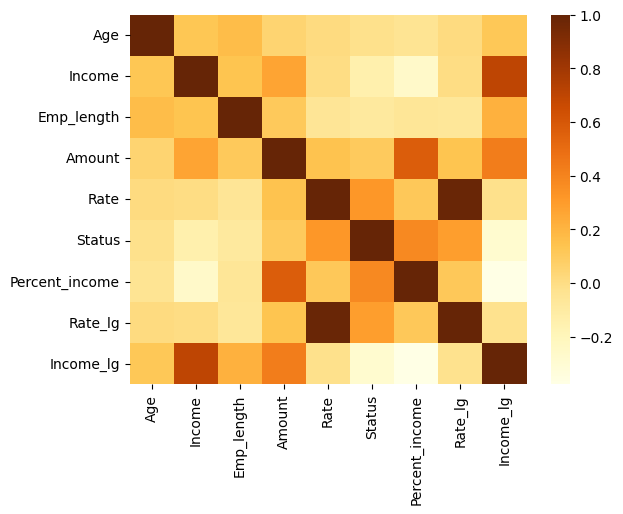

In [46]:
sns.heatmap(data.corr(),cmap='YlOrBr')

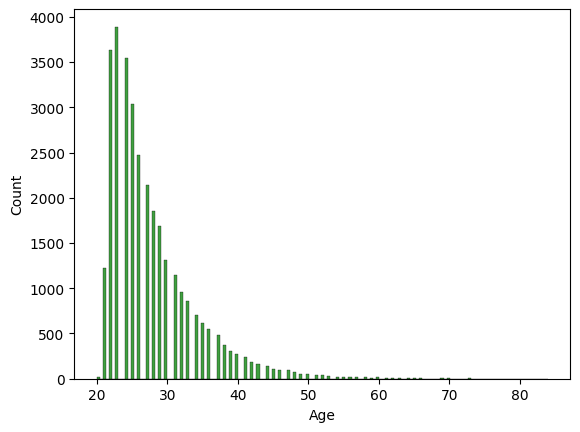

In [47]:
sns.histplot(data.Age,color='green')
pyp.show()

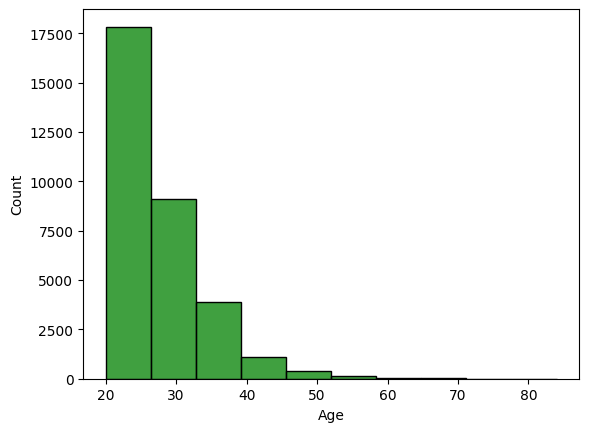

In [48]:
sns.histplot(data.Age,color='green',bins=10)
pyp.show()

In [49]:
data.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Rate_lg', 'Income_lg'],
      dtype='object')

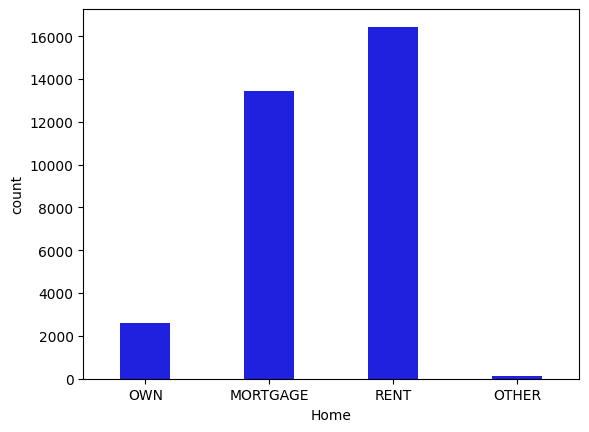

In [50]:
sns.countplot(x='Home',data=data,width=0.4,color='blue')
pyp.show()

In [51]:
data.Age.value_counts(bins=[20,26,31,41,56,76,90])

(19.999, 26.0]    17829
(26.0, 31.0]       8137
(31.0, 41.0]       5362
(41.0, 56.0]       1132
(56.0, 76.0]        115
(76.0, 90.0]          3
Name: Age, dtype: int64

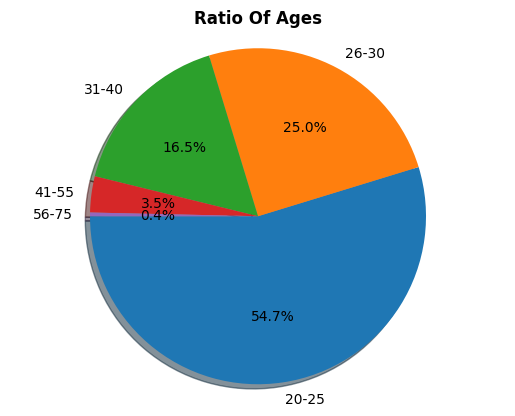

In [52]:
pyp.pie(data['Age'].value_counts(bins=[20,26,31,41,56,76]).values,labels=['20-25','26-30',\
                    '31-40','41-55','56-75'],autopct='%0.1f%%',startangle=180,shadow=True)
pyp.axis('equal')
pyp.title('Ratio Of Ages',weight='bold')
pyp.show()

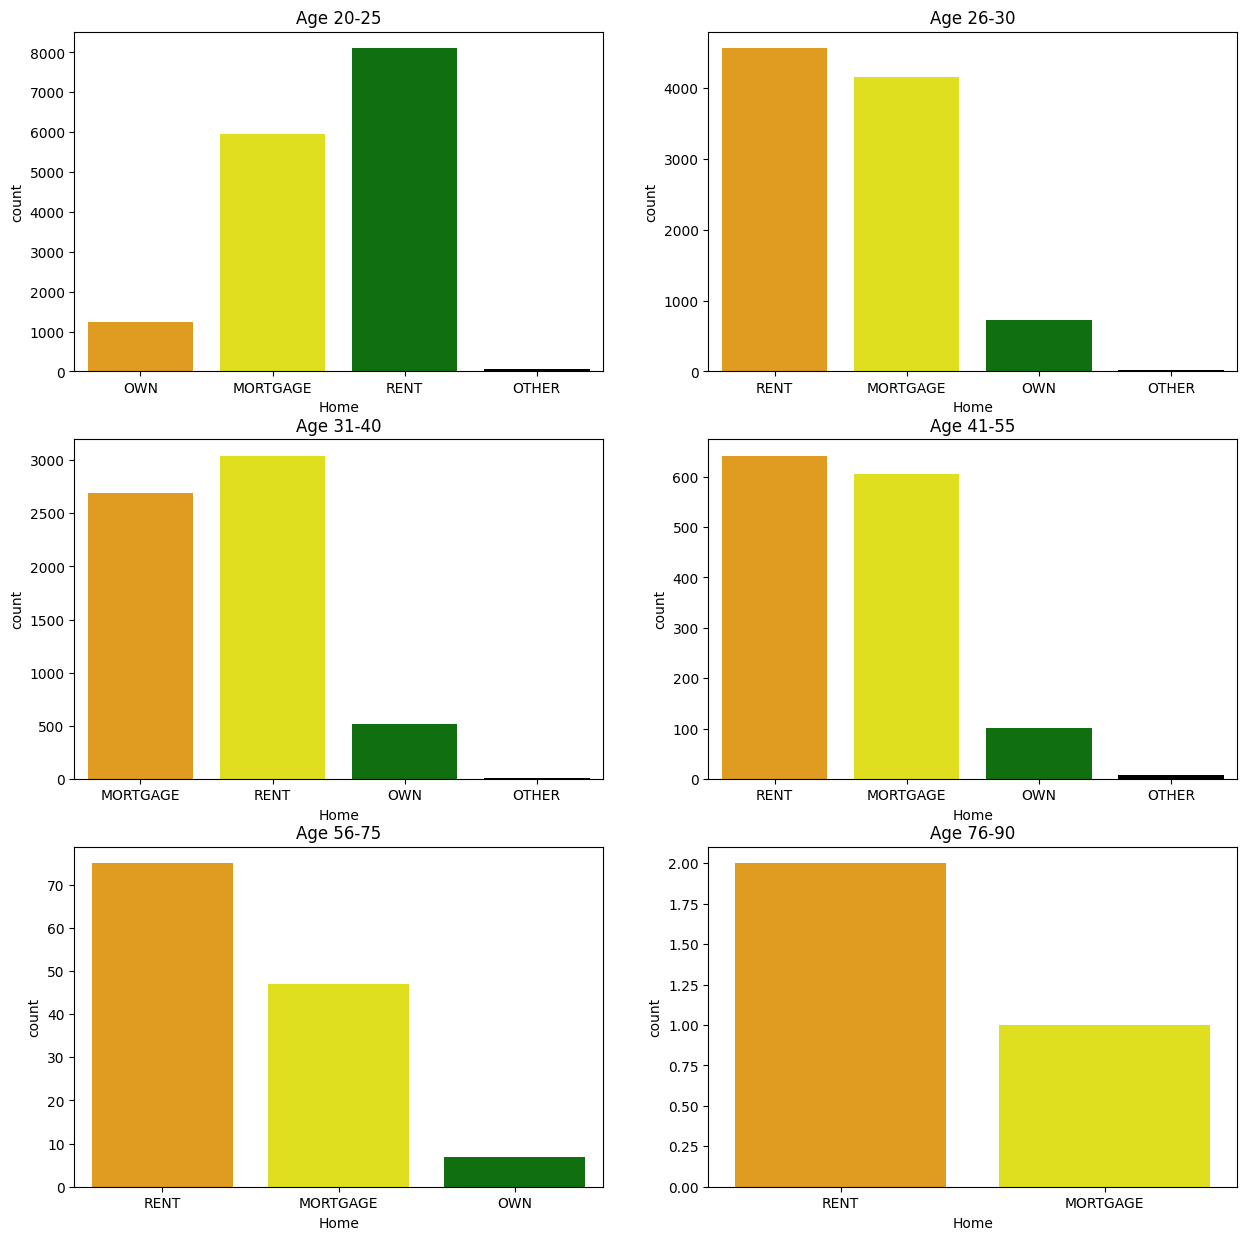

In [53]:
fig, ax = pyp.subplots(3,2,figsize=(15, 15))
sns.countplot(x=data[(data.Age>=20) & (data.Age<26)]['Home'],ax=ax[0][0], palette=['orange','yellow','green','black'])
ax[0][0].set_title('Age 20-25')
sns.countplot(x=data[(data.Age>=26) & (data.Age<31)]['Home'],ax=ax[0][1], palette=['orange','yellow','green','black'])
ax[0][1].set_title('Age 26-30')
sns.countplot(x=data[(data.Age>=31) & (data.Age<41)]['Home'],ax=ax[1][0], palette=['orange','yellow','green','black'])
ax[1][0].set_title('Age 31-40')
sns.countplot(x=data[(data.Age>=41) & (data.Age<56)]['Home'],ax=ax[1][1], palette=['orange','yellow','green','black'])
ax[1][1].set_title('Age 41-55')
sns.countplot(x=data[(data.Age>=56) & (data.Age<75)]['Home'],ax=ax[2][0], palette=['orange','yellow','green','black'])
ax[2][0].set_title('Age 56-75')
sns.countplot(x=data[data.Age>76]['Home'],ax=ax[2][1], palette=['orange','yellow','green','black'])
ax[2][1].set_title('Age 76-90')
pyp.show()

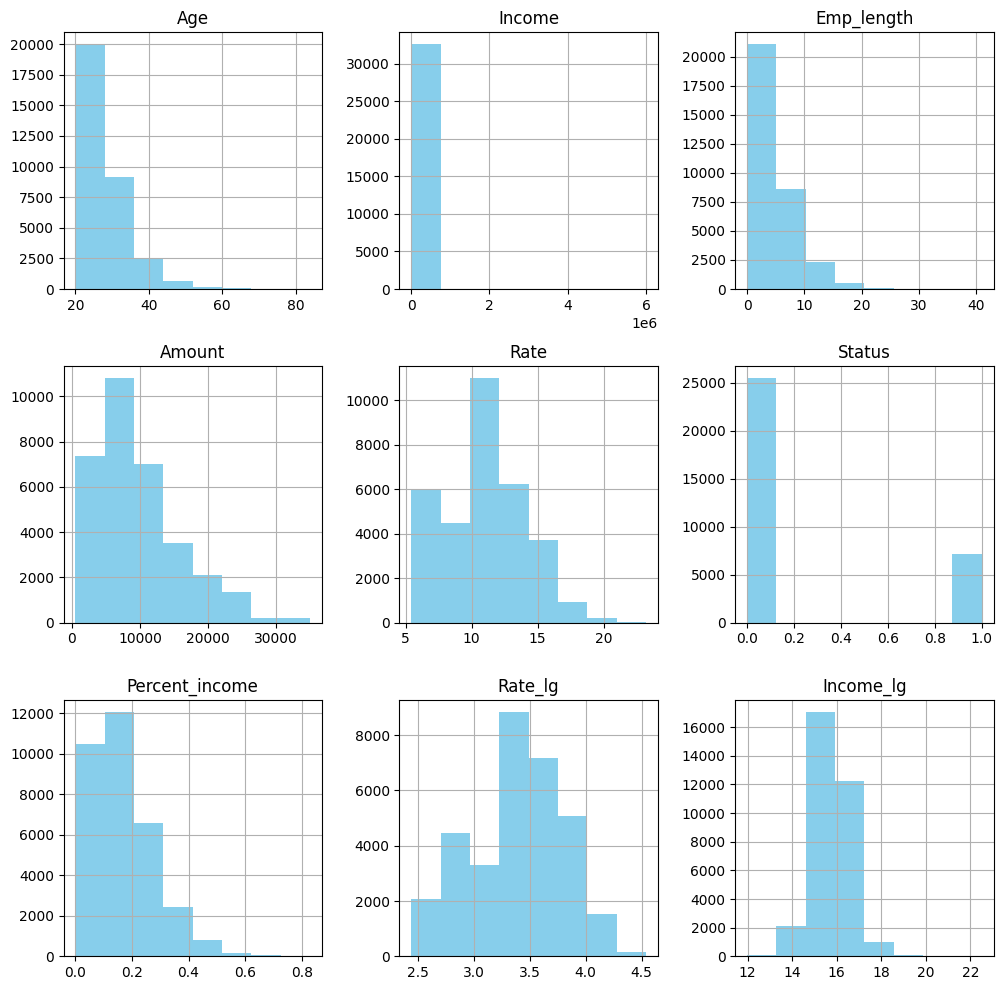

In [54]:
data.hist(figsize=(12,12),bins=8,color='skyblue')
pyp.show()

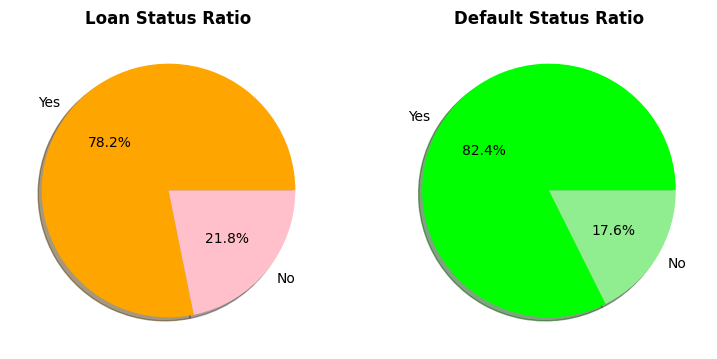

In [75]:
fig, ax = pyp.subplots(1,2,figsize=(9, 5))
ax[0].pie(data['Status'].value_counts().values,labels=['Yes','No'],shadow=True,autopct='%0.1f%%',colors=['orange','pink'])
ax[0].axis='equal'
ax[0].set_title('Loan Status Ratio',weight='bold')
ax[1].pie(data['Default'].value_counts().values,labels=['Yes','No'],shadow=True,autopct='%0.1f%%',colors=['lime','lightgreen'])
ax[1].axis='equal'
ax[1].set_title('Default Status Ratio',weight='bold')
pyp.show()

In [76]:
data.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00


In [78]:
label_encoder = LabelEncoder()

In [149]:
data['encoded_home'] = label_encoder.fit_transform(data['Home'])
data['encoded_intent'] = label_encoder.fit_transform(data['Intent'])
data['encoded_default'] = label_encoder.fit_transform(data['Default'])
data['encoded_age'] = label_encoder.fit_transform(data['Age'])

In [150]:
data.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default,encoded_age
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23,2,1,0,1
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23,0,3,0,5
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00,3,3,0,3


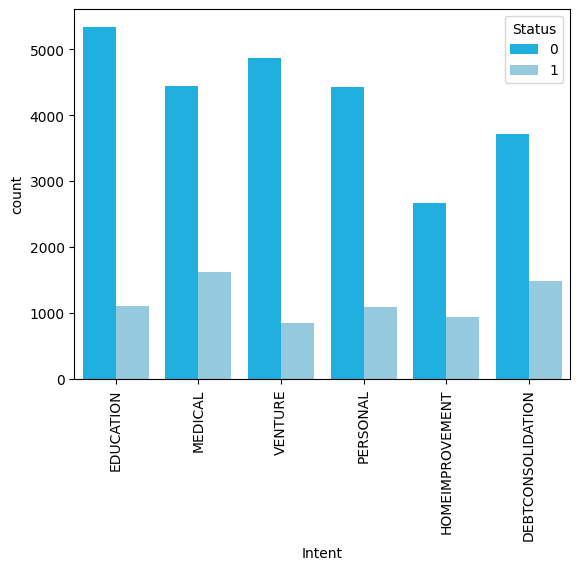

In [112]:
sns.countplot(x='Intent',hue='Status',data=data, palette=['deepskyblue', 'skyblue'])
pyp.xticks(rotation=90)
pyp.show()

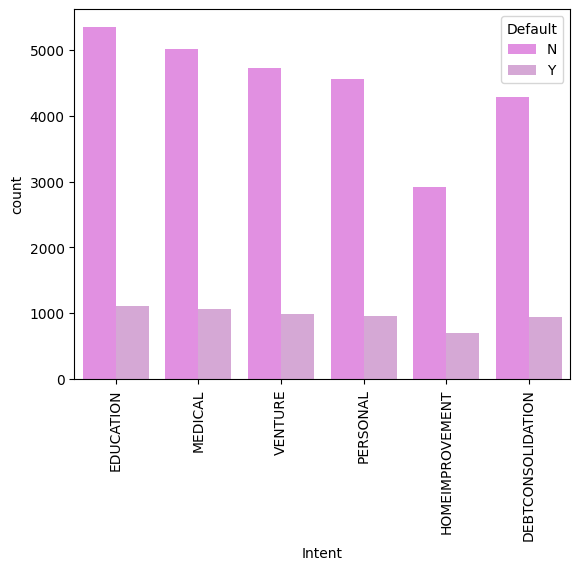

In [114]:
sns.countplot(x='Intent',hue='Default',data=data,palette=['violet', 'plum'])
pyp.xticks(rotation=90)
pyp.show()

In [86]:
x = data.drop(columns=['Status','Home','Intent','Default'])
x

,Age,Income,Emp_length,Amount,Rate,Percent_income,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default
1,21,9600,5,1000,11.14,0.10,3.48,13.23,2,1,0
2,25,9600,1,5500,12.87,0.57,3.69,13.23,0,3,0
3,23,65500,4,35000,15.23,0.53,3.93,16.00,3,3,0
4,24,54400,8,35000,14.27,0.55,3.83,15.73,3,3,1
5,21,9900,2,2500,7.14,0.25,2.84,13.27,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13.16,0.11,3.72,15.69,0,4,0
32577,54,120000,4,17625,7.49,0.15,2.90,16.87,0,4,0
32578,65,76000,3,35000,10.99,0.46,3.46,16.21,3,2,0
32579,56,150000,5,15000,11.48,0.10,3.52,17.19,0,4,0


In [89]:
y = data[['Status']]
y

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: Status, Length: 32578, dtype: int64

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [118]:
naive_bayes = NB()
naive_bayes.fit(x_train_scaled, y_train)
y_pred = naive_bayes.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 80.26396562308165


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DT(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 87.01657458563537


In [122]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23,2,1,0
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23,0,3,0
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00,3,3,0
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,3.83,15.73,3,3,1
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2.84,13.27,2,5,0


In [123]:
x_ = data.drop(columns=['Status','Home','Intent','Default','Rate','Income'])
x_

,Age,Emp_length,Amount,Percent_income,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default
1,21,5,1000,0.10,3.48,13.23,2,1,0
2,25,1,5500,0.57,3.69,13.23,0,3,0
3,23,4,35000,0.53,3.93,16.00,3,3,0
4,24,8,35000,0.55,3.83,15.73,3,3,1
5,21,2,2500,0.25,2.84,13.27,2,5,0
...,...,...,...,...,...,...,...,...,...
32576,57,1,5800,0.11,3.72,15.69,0,4,0
32577,54,4,17625,0.15,2.90,16.87,0,4,0
32578,65,3,35000,0.46,3.46,16.21,3,2,0
32579,56,5,15000,0.10,3.52,17.19,0,4,0


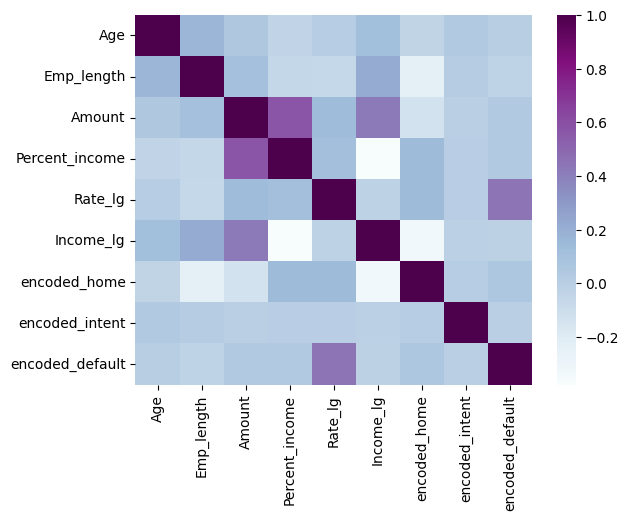

In [132]:
sns.heatmap(x_.corr(),cmap='BuPu')
pyp.show()

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.2, random_state=42)

In [125]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [126]:
naive_bayes = NB()
naive_bayes.fit(x_train_scaled, y_train)
y_pred = naive_bayes.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 82.28974831184776


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.2, random_state=42)
clf = DT(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 86.89379987722529


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DT(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 87.01657458563537


In [155]:
x

,Age,Income,Emp_length,Amount,Rate,Percent_income,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default
1,21,9600,5,1000,11.14,0.10,3.48,13.23,2,1,0
2,25,9600,1,5500,12.87,0.57,3.69,13.23,0,3,0
3,23,65500,4,35000,15.23,0.53,3.93,16.00,3,3,0
4,24,54400,8,35000,14.27,0.55,3.83,15.73,3,3,1
5,21,9900,2,2500,7.14,0.25,2.84,13.27,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,5800,13.16,0.11,3.72,15.69,0,4,0
32577,54,120000,4,17625,7.49,0.15,2.90,16.87,0,4,0
32578,65,76000,3,35000,10.99,0.46,3.46,16.21,3,2,0
32579,56,150000,5,15000,11.48,0.10,3.52,17.19,0,4,0


In [159]:
label_encoder.fit_transform([10000])

array([0], dtype=int64)

In [ ]:
clf.predict([[20,10000,500,6,0.05,0]])

In [161]:
data

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default,encoded_age
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23,2,1,0,1
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23,0,3,0,5
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00,3,3,0,3
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,3.83,15.73,3,3,1,4
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2.84,13.27,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N,3.72,15.69,0,4,0,37
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N,2.90,16.87,0,4,0,34
32578,65,76000,RENT,3,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,3.46,16.21,3,2,0,45
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N,3.52,17.19,0,4,0,36


In [166]:
data_ = data.drop(columns=['Rate_lg','Income_lg','encoded_home','encoded_intent','encoded_default','encoded_age'])
data_

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N
32578,65,76000,RENT,3,HOMEIMPROVEMENT,35000,10.99,1,0.46,N
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N


In [168]:
X = data_.drop(columns='Status')
Y = data['Status']

In [170]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=48)

In [171]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False),['Home','Intent','Default'])
]
,remainder='passthrough')

In [185]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3', DT(max_depth=12, random_state=1))
])

In [186]:
pipe1.fit(x_train,y_train)
y_pred = pipe1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 91.31368937998772


In [187]:
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3', XG(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
])

In [189]:
pipe2.fit(x_train,y_train)
y_pred = pipe2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 92.63351749539595


In [190]:
pk.dump(pipe2, open("pipe.pkl","wb"))

In [192]:
data['Home'].value_counts()

RENT        16444
MORTGAGE    13443
OWN          2584
OTHER         107
Name: Home, dtype: int64

In [193]:
data['Intent'].value_counts()

EDUCATION            6453
MEDICAL              6070
VENTURE              5718
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Intent, dtype: int64

In [203]:
input_df = pd.DataFrame({'Age':[25], 'Income':[9900], 'Home':['OWN'], 'Emp_length':[2], 'Intent':['VENTURE'], 'Amount':[2500], 'Rate':[7.14], 'Percent_income':[0.00], 'Default':['N']})
pipe.predict(input_df)

array([1], dtype=int64)

In [200]:
data

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Rate_lg,Income_lg,encoded_home,encoded_intent,encoded_default,encoded_age
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,3.48,13.23,2,1,0,1
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3.69,13.23,0,3,0,5
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,3.93,16.00,3,3,0,3
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,3.83,15.73,3,3,1,4
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2.84,13.27,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,5800,13.16,0,0.11,N,3.72,15.69,0,4,0,37
32577,54,120000,MORTGAGE,4,PERSONAL,17625,7.49,0,0.15,N,2.90,16.87,0,4,0,34
32578,65,76000,RENT,3,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,3.46,16.21,3,2,0,45
32579,56,150000,MORTGAGE,5,PERSONAL,15000,11.48,0,0.10,N,3.52,17.19,0,4,0,36
